### EE6310: Image and Video Processing
#### Assignment 2

Link to NASA image used: https://apod.nasa.gov/apod/ap120109.html

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(path):
    image = plt.imread(path)
    return image

def display_image(image, size = 4, title = None):
    aspect_ratio = image.shape[1]/image.shape[0]
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.show()

def plot_histogram(image, title = None, plot = True):
    hist= np.zeros(256, dtype = np.int32)

    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            hist[image[i][j]] += 1

    if (plot):
        plt.stairs(hist, fill= True)
        plt.title(title)
        plt.show()   

    return hist 

#### Gray Scale Point Operations

Write a program/function to do the following:
1. Perform simple linear point operations for the following cases:
<br/>(a) J = P.I.
<br/>(b) J = I + L. 
<br/>(c) J = P.I + L.
<br/>In each case, verify that the histogram of J is related to the histogram of I according to the relation discussed in class.

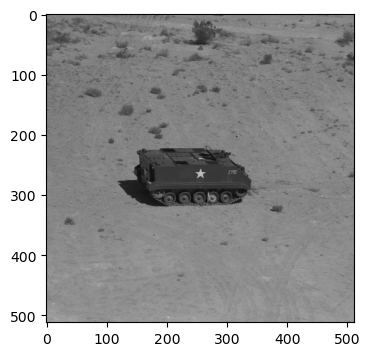

In [3]:
image = read_image('misc/7.1.08.tiff')

display_image(image)

In [4]:
def pointwise_adding_scaling(image, P, L):

    new_image = np.zeros(image.shape, dtype = np.uint32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i][j] = np.round(P * image[i][j] + L)

            if (new_image[i][j] < 0):
                new_image[i][j] = 0
            elif (new_image[i][j] > 255):
                new_image[i][j] = 255
    return new_image

In [5]:
def calc_hist(hist_orig, P, L):
    hist_new = np.zeros(hist_orig.shape, dtype=np.int32)

    for i in range(hist_orig.shape[0]):
        temp = int(np.round(P * i + L))
        if temp < 0:
            temp = 0
        elif temp > 255:
            temp = 255
        hist_new[temp] += hist_orig[i]
    return hist_new

For the following, we are verifying the property as follows:
<br/>We first compute the new image from the original image using the relation. Then we compute the histogram of this new image. Lets call this hist1. Now, we compute the new histogram from the original histogram. Lets call this hist2.

We are comparing if hist1 is equal to hist2

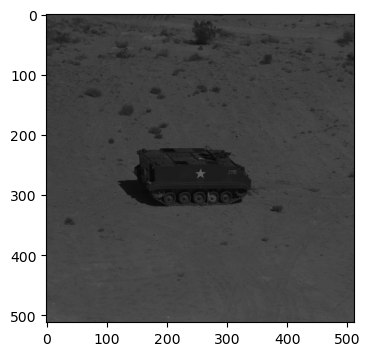

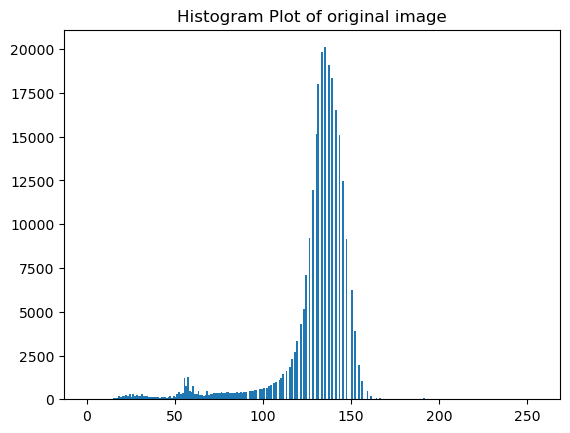

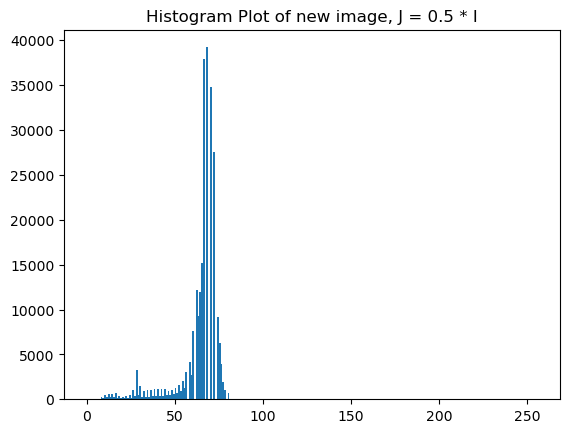

The property is verified


In [6]:
# (a) J = P.I
P = 0.5

new_image = pointwise_adding_scaling(image, P, 0)
display_image(new_image)

hist_orig = plot_histogram(image, "Histogram Plot of original image")
hist_new = plot_histogram(new_image, f"Histogram Plot of new image, J = {P} * I")

# calculating histogram from original histogram
hist_calculated = calc_hist(hist_orig, P, 0)

if (np.array_equal (hist_new, hist_calculated)):
    print("The property is verified")
else:
    print("False")


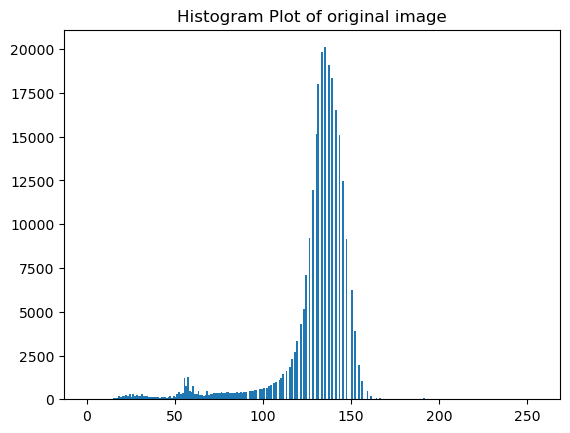

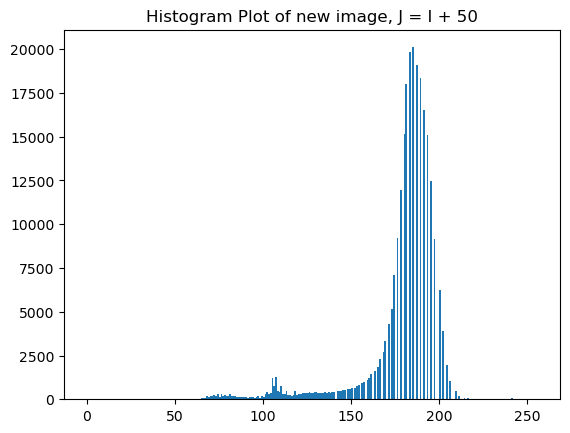

The property is verified


In [7]:
# J = I + L
L = 50
new_image = pointwise_adding_scaling(image, 1, L)

hist_orig = plot_histogram(image, "Histogram Plot of original image")
hist_new =  plot_histogram(new_image, f"Histogram Plot of new image, J = I + {L}")

hist_calculated = calc_hist(hist_orig, 1, L)

if (np.array_equal (hist_new, hist_calculated)):
    print("The property is verified")
else:
    print("False")

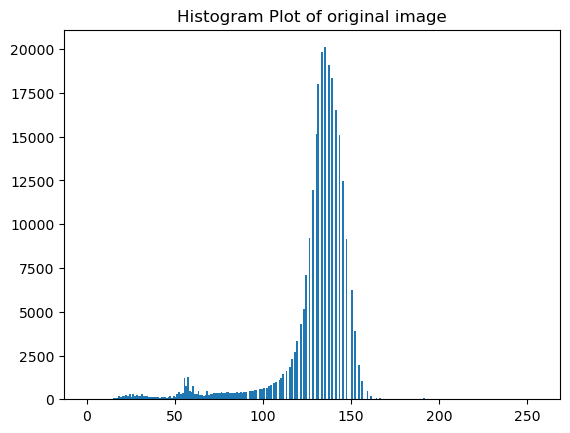

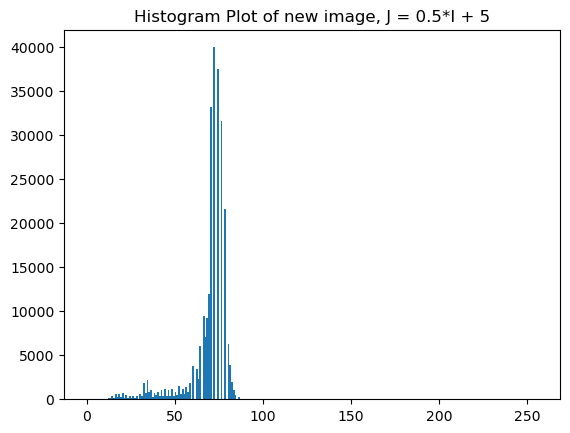

The property is verified


In [8]:
# J = I + L
L = 5
P = 0.5
new_image = pointwise_adding_scaling(image, P, L)

hist_orig = plot_histogram(image, "Histogram Plot of original image")
hist_new =  plot_histogram(new_image, f"Histogram Plot of new image, J = {P}*I + {L}")

hist_calculated = calc_hist(hist_orig, P, L)

if (np.array_equal (hist_new, hist_calculated)):
    print("The property is verified")
else:
    print("False")

2. Full scale contrast stretch (FSCS). Verify your result by printing the min and max pixel values before
and after applying FSCS. Also, plot the histogram of the image before and after applying FSCS.

In [9]:
def FSCS(image):
    A = np.amin(image)
    B = np.amax(image)
    K = 256

    P = (K - 1)/(B - A)
    L = -1 * A * (K - 1)/(B - A)

    new_image = pointwise_adding_scaling(image, P, L)
    
    return new_image

Min and Max values before applying FSCS: 12 215


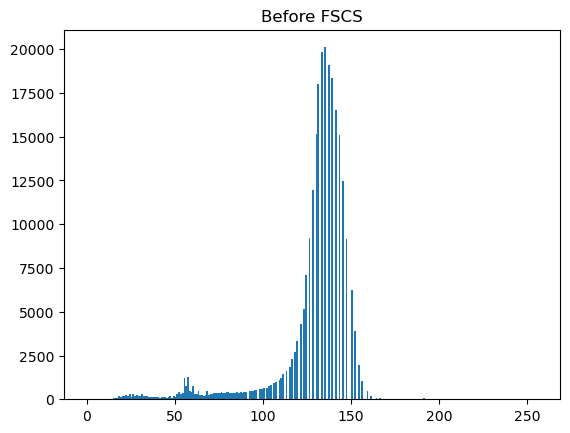

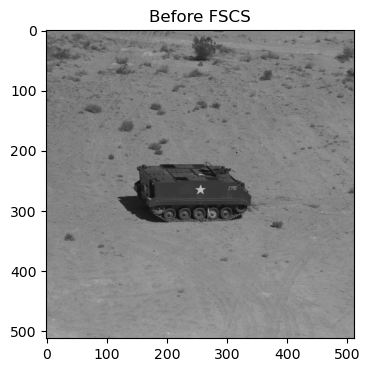

After FSCS, new min and max values: 0 255


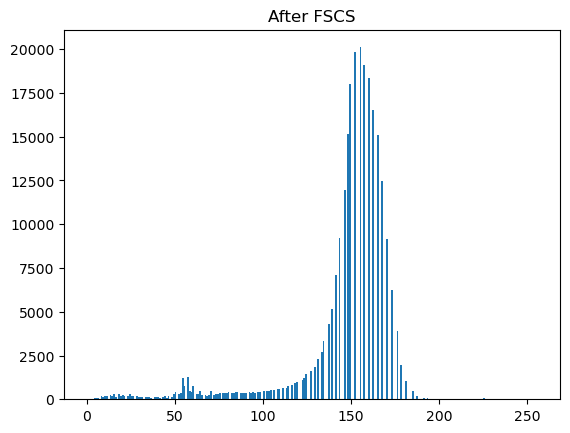

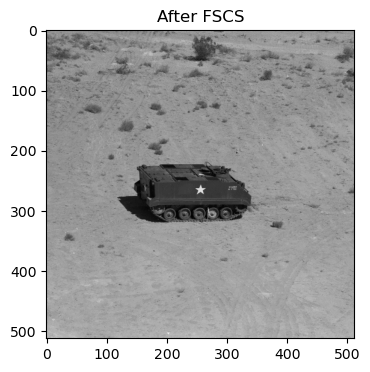

In [10]:
print("Min and Max values before applying FSCS:", np.amin(image), np.amax(image))
hist_orig = plot_histogram(image, "Before FSCS")
display_image(image, title = "Before FSCS")

new_image = FSCS(image)
print("After FSCS, new min and max values:", np.amin(new_image), np.amax(new_image))
hist_new= plot_histogram(new_image, "After FSCS")
display_image(new_image, title = "After FSCS")

3. Log magnitude compression (always followed by FSCS). Plot the histogram of the image before and
after applying log magnitude compression.

In [11]:
def log_magnitude_compression(image):
    new_image = np.zeros((image.shape[0], image.shape[1]), dtype = 'uint8')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i][j] = np.log(image[i][j] + 1)
    return new_image

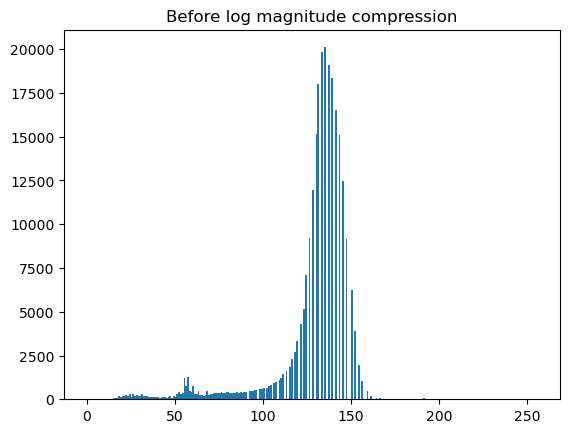

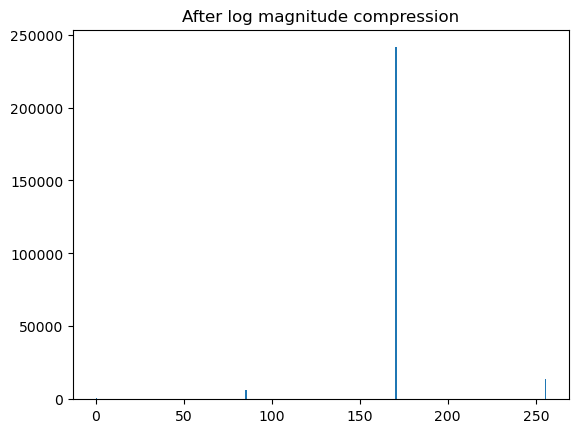

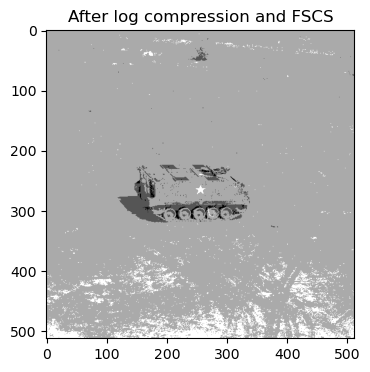

In [12]:
hist_orig= plot_histogram(image, "Before log magnitude compression")

new_image = log_magnitude_compression(image)
new_image = FSCS(new_image)

hist_new= plot_histogram(new_image, "After log magnitude compression")
display_image(new_image, title = "After log compression and FSCS")

4. Gamma correction: J = $I^γ$ with γ = 1.4. Clip pixel values greater than 255 to 255. Plot the histogram
of the image before and after applying gamma correction.

In [13]:
def gamma_correction(image, gamma):

    new_image = np.zeros(image.shape, dtype = 'uint32')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i][j] = min(image[i][j] ** gamma, 255)
    
    return new_image

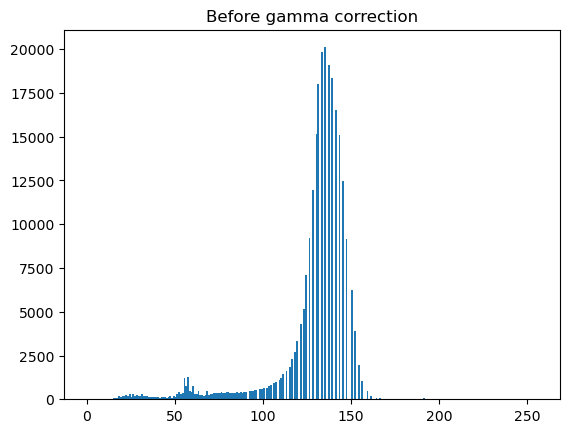

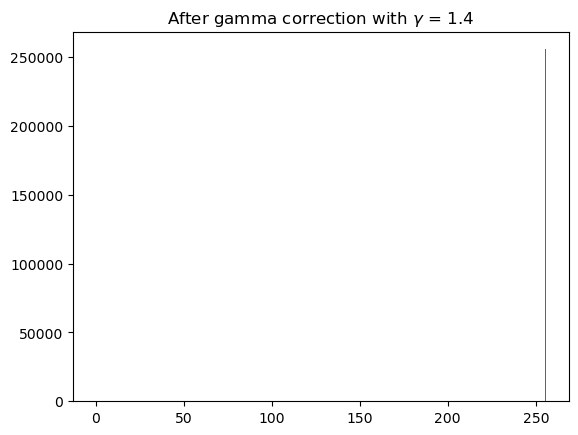

In [14]:
plot_histogram(image, "Before gamma correction")

new_image = gamma_correction(image, 1.4)

plot_histogram(new_image, "After gamma correction with $\gamma$ = 1.4");

5. Histogram flattening. Plot the histogram of the image before and after applying histogram flattening.

In [15]:
def hist_flatten(image):

    hist_image = plot_histogram(image, plot = False)
    normalised_hist = hist_image / (image.shape[0]*image.shape[1])

    cumulative_hist = np.zeros(normalised_hist.shape)
    cumulative_hist[0] = normalised_hist[0]

    for i in range(1, normalised_hist.shape[0]):
        cumulative_hist[i] = cumulative_hist[i - 1] + normalised_hist[i]

    cumulative_image = cumulative_hist[image]

    return FSCS(cumulative_image)

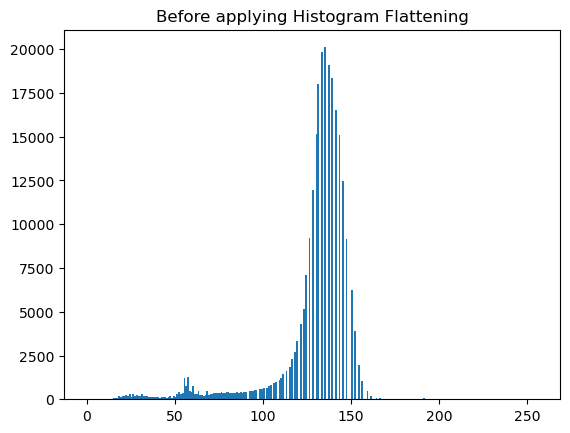

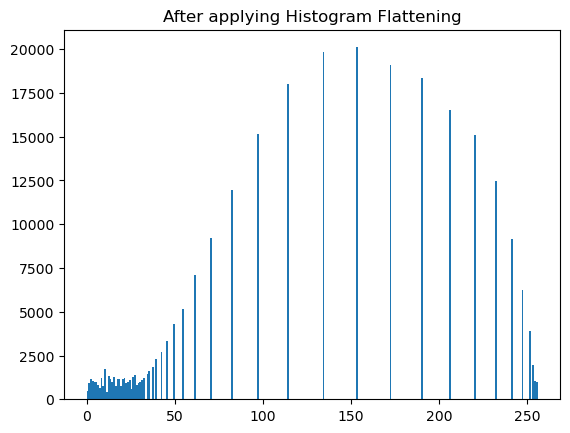

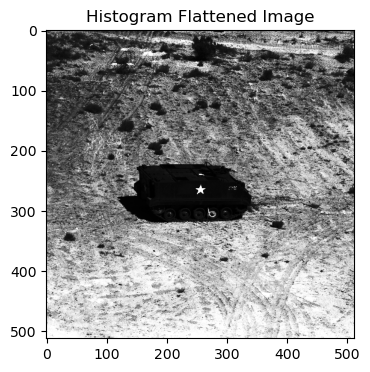

In [16]:
plot_histogram(image, "Before applying Histogram Flattening")
hist_flatten_image = hist_flatten(image)
plot_histogram(hist_flatten_image, "After applying Histogram Flattening")
display_image(hist_flatten_image, title= "Histogram Flattened Image")

Now test your implementation using copyright-free images from NASA’s site. Compare the original image
with the output of each of the three operations above. Comment on the quality of the original images based
on the output of these operations. Make sure your image display function doesn’t do any further contrast
stretching.

In [17]:
from PIL import Image
nasa_image = np.array(Image.open('misc/nasa.jpg').convert('L'))

i) Log magnitude compression

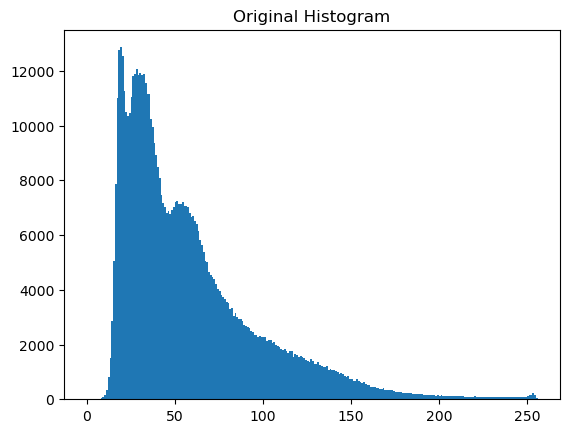

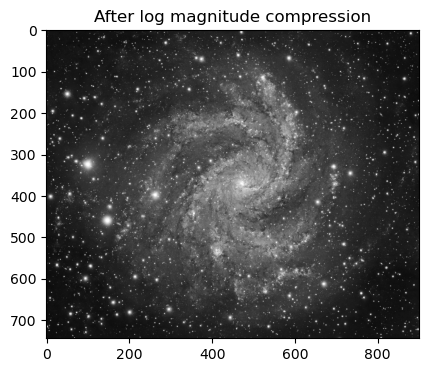

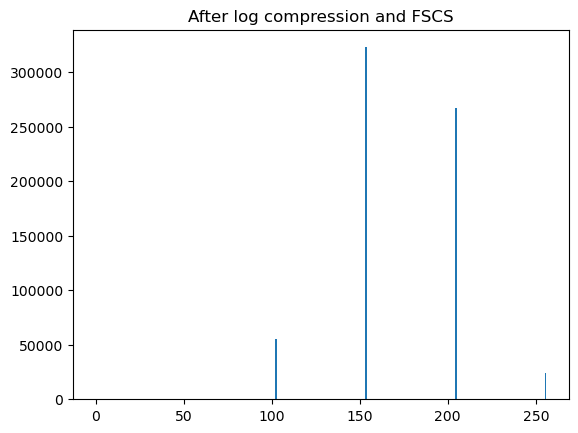

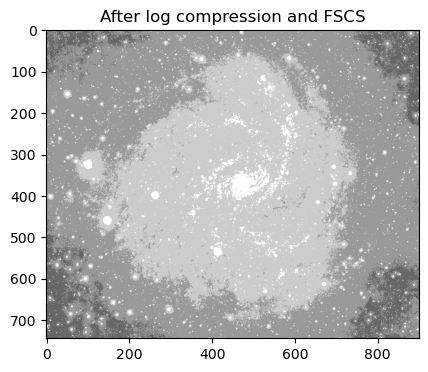

In [18]:
hist_orig = plot_histogram(nasa_image, "Original Histogram")

new_image = log_magnitude_compression(nasa_image)
display_image(nasa_image, title = "After log magnitude compression")

new_image = FSCS(new_image)
hist_new = plot_histogram(new_image, "After log compression and FSCS")
display_image(new_image, title = "After log compression and FSCS")

A gaseous cloud which was hidden by the bright intensity of the stars is now visible after log magnitude compression and FSCS. The quality of the original image is very high to have captured such intricate details.

ii) Gamma correction

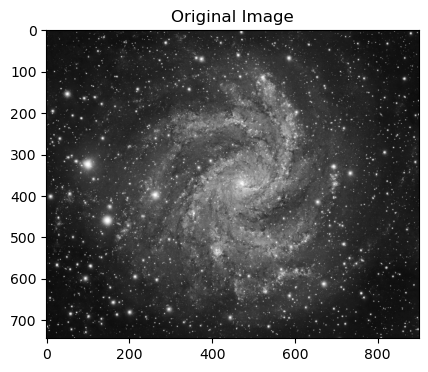

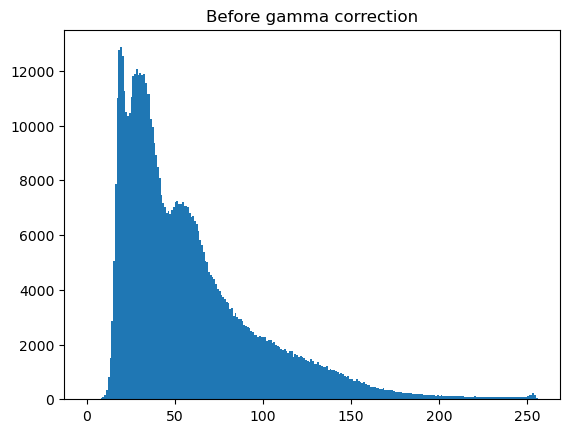

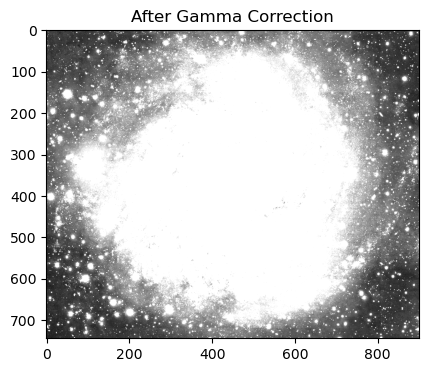

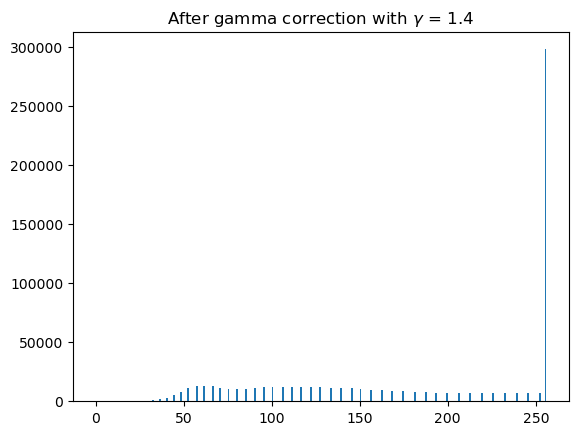

In [19]:
display_image(nasa_image, title = "Original Image")
hist_orig = plot_histogram(nasa_image, "Before gamma correction")

new_image = gamma_correction(nasa_image, 1.4)
display_image(new_image, title = "After Gamma Correction")
hist_new = plot_histogram(new_image, "After gamma correction with $\gamma$ = 1.4")

All of the bright pixels saturate to 255 and the other darker pixels come into focus. $\gamma$ correction reduces the range of the image and merges some frequencies together. It increases the perceived contrast of the image as well.

iii) Histogram Flattening

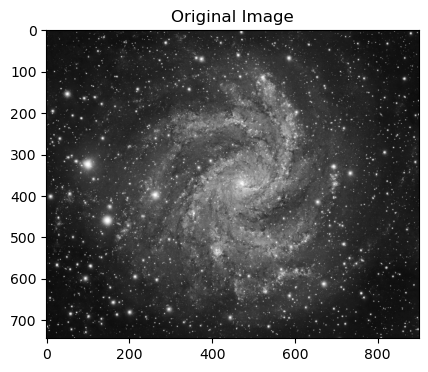

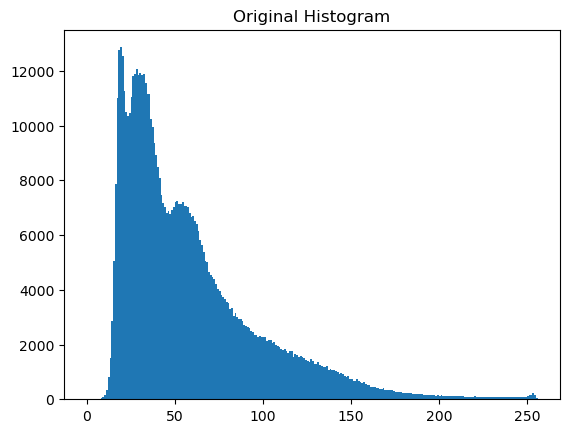

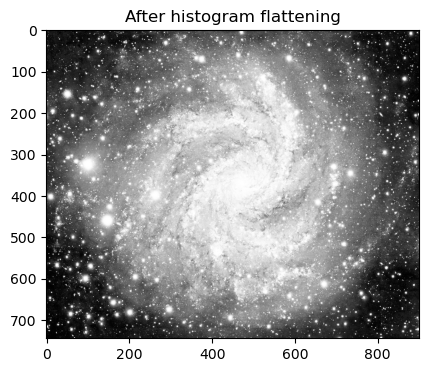

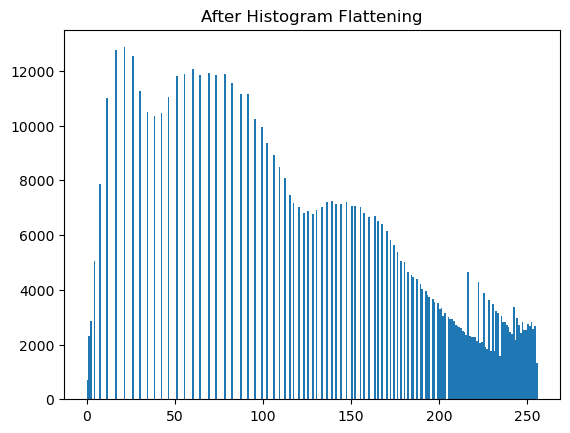

In [20]:
display_image (nasa_image, title = "Original Image")
hist_orig = plot_histogram(nasa_image, "Original Histogram")

hist_flatten_image = hist_flatten(nasa_image)
display_image(hist_flatten_image, title= "After histogram flattening")
hist_orig = plot_histogram(hist_flatten_image, "After Histogram Flattening")

On flattening the histogram, the contrast of the image increases slightly.

#### 2. Image Zooming

Write a program to zoom an image by 1.5 times along each axis using the following techniques discussed
in class:

1. Nearest neighbor.

In [21]:
def nearest_neighbour_interpolation(image, scale_row, scale_col):

    new_row_size = int(np.round(scale_row * image.shape[0]))
    new_col_size = int(np.round(scale_row * image.shape[1]))
    zoomed_image = np.zeros((new_row_size, new_col_size), dtype= np.int32)

    row_positions = np.zeros(new_row_size)   
    column_positions = np.zeros(new_col_size)

    for i in range(new_row_size):
        row_positions[i] = int(np.ceil((i + 1)/scale_row))
    
    for i in range(new_col_size):
        column_positions[i] = int(np.ceil((i + 1)/scale_col))

    for i in range(new_row_size):
        for j in range(new_col_size):
            zoomed_image[i][j] = image[int(row_positions[i]) - 1][int(column_positions[j]) - 1]
    
    return zoomed_image

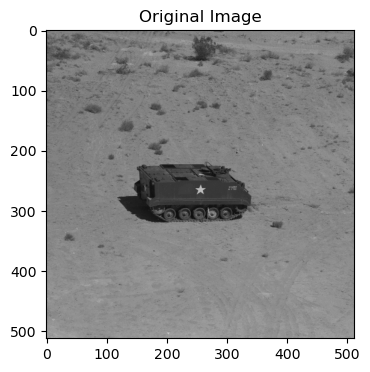

Original Image size: (512, 512)


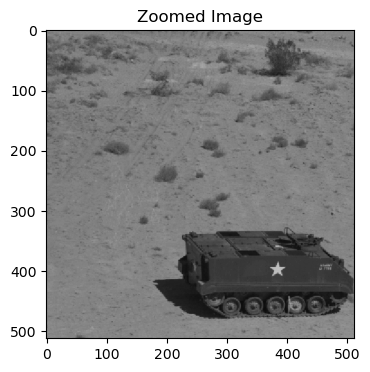

Zoomed image size: (768, 768)


In [22]:
image_used = image

display_image(image_used, title = "Original Image")
print("Original Image size:", image_used.shape)

zoomed_image = nearest_neighbour_interpolation(image_used, 1.5, 1.5)

display_image(zoomed_image[:image_used.shape[0], :image_used.shape[1]], title = "Zoomed Image")
print("Zoomed image size:", zoomed_image.shape)

In [23]:
def intensity_calc(image, row, col):
    i_arr = np.zeros(4)
    j_arr = np.zeros(4)

    i_arr[0] = row
    j_arr[0] = col

    i_arr[1] = row + 1
    j_arr[1] = col + 1

    i_arr[2] = row
    j_arr[2] = col + 1

    i_arr[3] = row + 1
    j_arr[3] = col

    A = np.zeros((4, 4))
    B = np.zeros(4)

    for i in range(4):
        A[i] = np.array([1, i_arr[i], j_arr[i], i_arr[i]*j_arr[i]])
        B[i] = image[int(i_arr[i])][int(j_arr[i])]
        
    matrix = np.dot(np.linalg.inv(A), B)

    return matrix

In [24]:
def bilinear_interpolation(image, scale_row, scale_col):
    N = image.shape[0]    # N -> no of rows
    M = image.shape[1]    # M -> no of cols

    N_new = int(np.round(N * scale_row))
    M_new = int(np.round(M * scale_col))

    new_image = np.zeros((N_new, M_new), dtype = np.int32)

    rows = np.arange(N_new)
    cols = np.arange(M_new)

    padded_image = np.pad(image, [(0, 1), (0, 1)], mode = 'constant')

    for row in rows:
        for col in cols:
            matrix = intensity_calc(padded_image, np.floor(row/scale_row), np.floor(col/scale_col))
            intensity = int(np.round(matrix[0] + matrix[1] * (row/scale_row) + matrix[2] * (col/scale_col) + matrix[3] * (row/scale_row) * (col/scale_col)))
            new_image[row][col] = intensity

    return new_image


Original Image size: (512, 512)


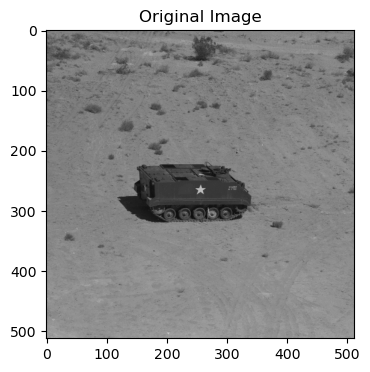

Zoomed Image size: (768, 768)


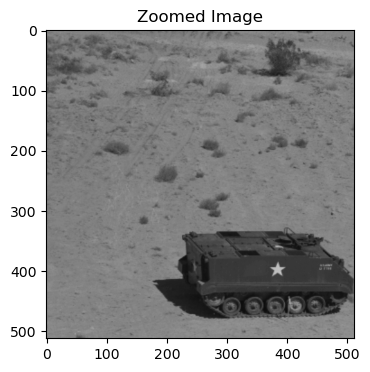

In [25]:
bilinear_interpolated = bilinear_interpolation(image, 1.5, 1.5)

print("Original Image size:", image.shape)
display_image(image, title = "Original Image")

print("Zoomed Image size:", bilinear_interpolated.shape)
display_image (bilinear_interpolated[0:image.shape[0], 0:image.shape[1]], title="Zoomed Image")

In [26]:
image_2 = read_image('misc/5.1.10.tiff')

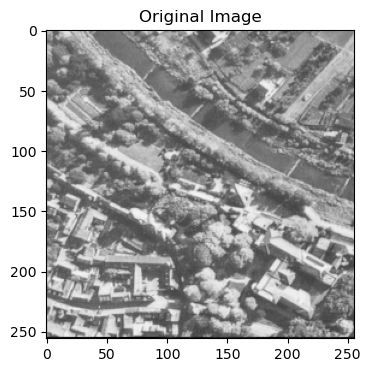

Original Image size: (256, 256)


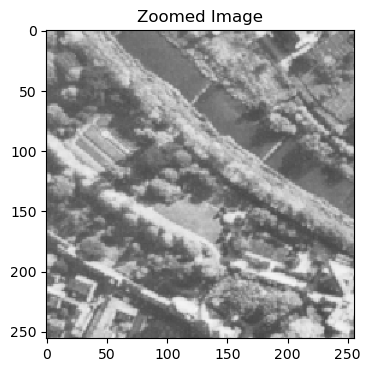

Zoomed image size: (384, 384)


In [27]:
image_used = image_2

display_image(image_used, title = "Original Image")
print("Original Image size:", image_used.shape)

zoomed_image = nearest_neighbour_interpolation(image_used, 1.5, 1.5)

display_image(zoomed_image[:image_used.shape[0], :image_used.shape[1]], title = "Zoomed Image")
print("Zoomed image size:", zoomed_image.shape)

Original Image size: (256, 256)


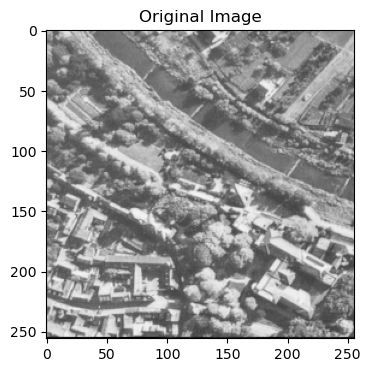

Zoomed image size: (384, 384)


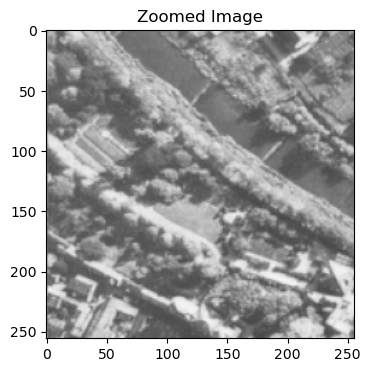

In [28]:
bilinear_interpolated = bilinear_interpolation(image_2, 1.5, 1.5)

print("Original Image size:", image_2.shape)
display_image(image_2, title = "Original Image")

print("Zoomed image size:", bilinear_interpolated.shape)
display_image (bilinear_interpolated[0:image_2.shape[0], 0:image_2.shape[1]], title="Zoomed Image")

In [29]:
image_3 = read_image('misc/7.1.02.tiff')

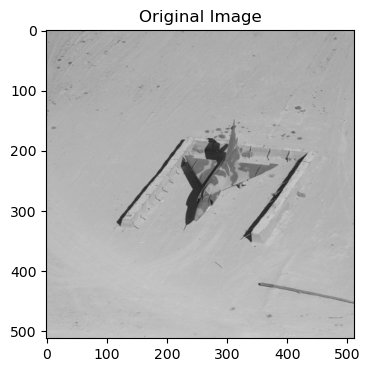

Original Image size: (512, 512)


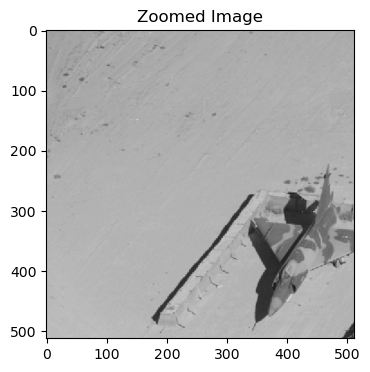

Zoomed image size: (768, 768)


In [30]:
image_used = image_3

display_image(image_used, title = "Original Image")
print("Original Image size:", image_used.shape)

zoomed_image = nearest_neighbour_interpolation(image_used, 1.5, 1.5)

display_image(zoomed_image[:image_used.shape[0], :image_used.shape[1]], title = "Zoomed Image")
print("Zoomed image size:", zoomed_image.shape)

Original Image size: (512, 512)


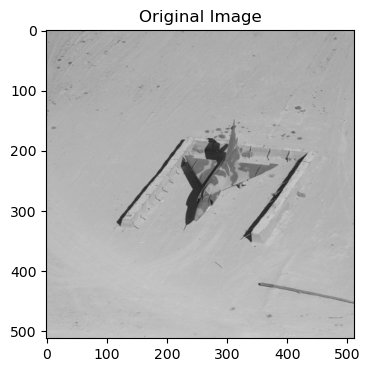

Zoomed image size: (768, 768)


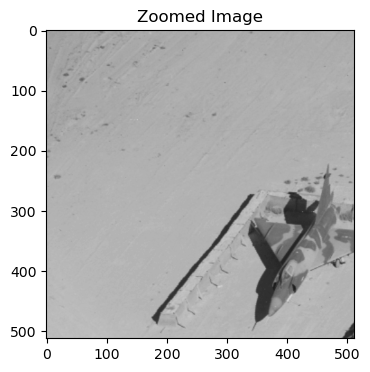

In [31]:
bilinear_interpolated = bilinear_interpolation(image_3, 1.5, 1.5)

print("Original Image size:", image_3.shape)
display_image(image_3, title = "Original Image")

print("Zoomed image size:", bilinear_interpolated.shape)
display_image (bilinear_interpolated[0:image_3.shape[0], 0:image_3.shape[1]], title="Zoomed Image")

##### Observations:

When you compare the nearest neighbour method and the bilinear interpolation method, on first glance both images might look same for higher quality images. However, if you look at the interpolations for image_2, its is clear that the nearest neighbour method gives more pixelated results and the result from bilinear interpolation is much smoother.

##### Computational complexity:

Since we are performing matrix inverse and dot products in every step of bilinear interpolation, it is much more computationally complex. Solving Ax = B, has $O(N^3)$ time complexity for an NxN matirx. But since here N = 4 (we only compute A, B, C, D using 4 neighbours), it becomes a constant value.

Time complexity of nearest neighbour: $O(NM)$ which is essentially $O(n^2)$<br/>
Time complexity of bilinear interpolation: $O(NM)$ which is essentially $O(n^2)$

However, when you run the program, the bilinear code takes longer to run due to the constant computations of the inverse and the matrix multiplications.

#### 3 2D-DFT (15)
Recall the definition of the 2D-DFT from class. Use square gray-scale images whose side is a power of
two (e.g., the USC SIPI images). Write a program that implements the DFT/IDFT pair using the following
techniques.

1. From first principles i.e., as a summation over two dimensions.

In [32]:
def DFT_2D(image):

    M = image.shape[1]
    N = image.shape[0]

    I_DFT = np.zeros((N, M), dtype = np.complex128)

    for u in range(N):
        for v in range(M):

            for i in range(N):
                for j in range(M):
                    I_DFT[u][v] += image[i][j] * np.exp(-1j*2*np.pi*u*i/N) * np.exp(-1j*2*np.pi*v*j/M)
    
    return I_DFT

In [33]:
def IDFT_2D(dft):

    M = dft.shape[1]
    N = dft.shape[0]

    IDFT = np.zeros((N, M), dtype = np.complex128)

    for i in range(N):
        for j in range(M):

            for u in range(N):
                for v in range(M):
                    IDFT[i][j] += (1/(M*N)) * dft[u][v] * np.exp(1j*2*np.pi*u*i/N) * np.exp(1j*2*np.pi*v*j/M)
    
    return np.round(np.real(IDFT))

In [34]:
temp = image[64:96, 64:96]
dft = DFT_2D(temp)
inv_dft = IDFT_2D(dft)

var = True
for i in range(inv_dft.shape[0]):
    for j in range(inv_dft.shape[1]):
        if (int(inv_dft[i][j]) != temp[i][j]):
            print(int(inv_dft[i][j]), temp[i][j])
            var = False
            print("False")
            break

if (var):
    print("Verified DFT and IDFT relation")

Verified DFT and IDFT relation


2. Matrix multiplication using the complex exponential matrix.

In [35]:
def dft_matrix(image):
    N = image.shape[0]
    matrix = np.zeros((N, N), dtype = np.complex128)

    w_n = np.exp(-2j * np.pi/N)

    for i in range(N):
        for j in range(N):
            matrix[i][j] = w_n ** (i * j)

    I_DFT = np.dot((np.dot(matrix, image)), matrix)

    return I_DFT

In [36]:
def IDFT_matrix(dft):
    N = dft.shape[0]
    matrix = np.zeros((N, N), dtype = np.complex128)
    IDFT = np.zeros((N, N), dtype = np.float32)

    w_n = np.exp(-2j * np.pi/N)

    for i in range(N):
        for j in range(N):
            matrix[i][j] =(1/N) * w_n ** (-1*(i * j))

    IDFT = np.dot((np.dot(matrix, dft)), matrix)

    return np.round(np.real(IDFT))

1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transforma-
tion.

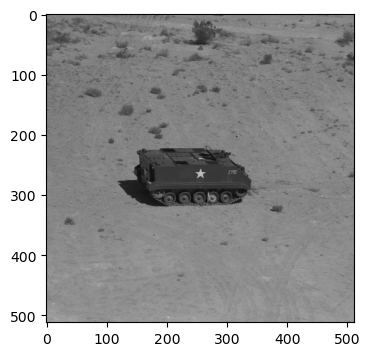

In [37]:
dft_image = image
display_image(dft_image)

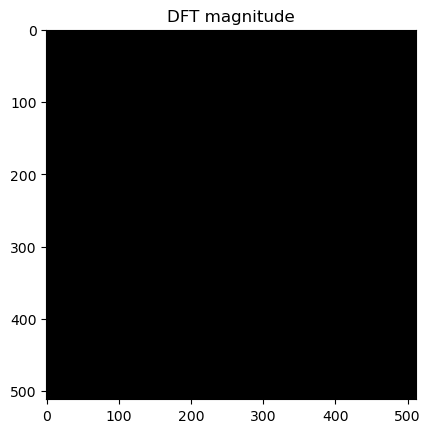

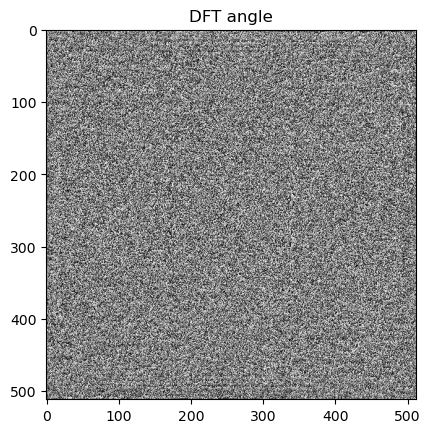

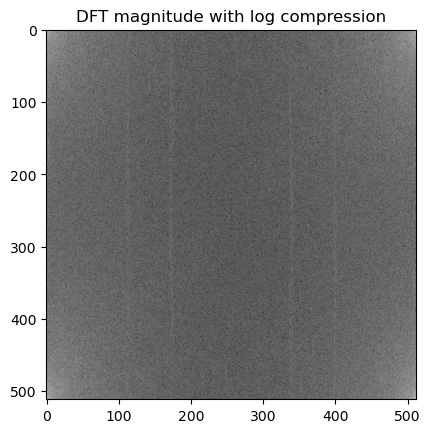

In [38]:
DFT_I = dft_matrix(dft_image)
DFT_mag = np.zeros(DFT_I.shape, dtype = np.float32)
# DFT_phase = 
DFT_mag = np.abs(DFT_I)
DFT_angle = np.angle(DFT_I)
DFT_mag_log = FSCS(log_magnitude_compression(DFT_mag))

plt.imshow(DFT_mag, cmap='gray')
plt.title("DFT magnitude")
plt.show()

plt.imshow(DFT_angle, cmap='gray')
plt.title("DFT angle")
plt.show()

plt.imshow(DFT_mag_log, cmap='gray')
plt.title("DFT magnitude with log compression")
plt.show()

Generate the centered DFT using $(−1)^{i+j}$ I and display its magnitude.

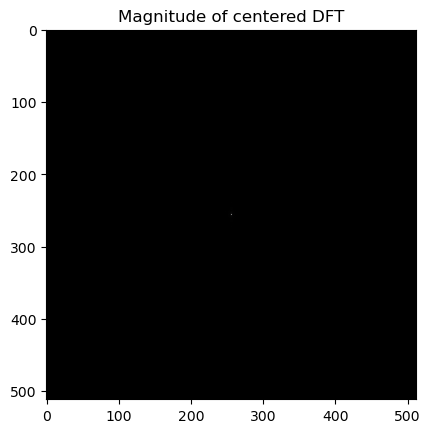

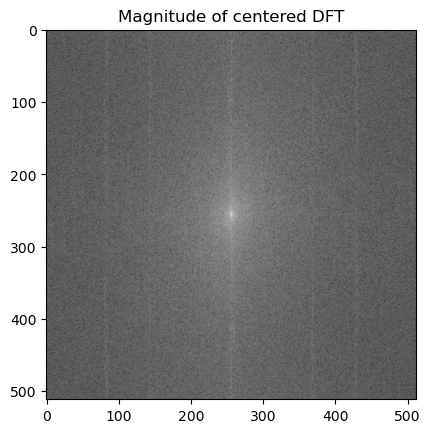

In [39]:
centered_I = np.zeros(dft_image.shape, dtype = np.float32)

for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        centered_I[i][j] = (-1)**(i + j) * dft_image[i][j]

centered_DFT = np.zeros(dft_image.shape, dtype = np.complex128)
centered_DFT = dft_matrix(centered_I)

centered_DFT_mag = abs(centered_DFT)

plt.imshow(centered_DFT_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

centered_DFT_log_mag = FSCS(log_magnitude_compression(centered_DFT_mag))


plt.imshow(centered_DFT_log_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

Verify that IDFT[DFT[I]] = I. (1)

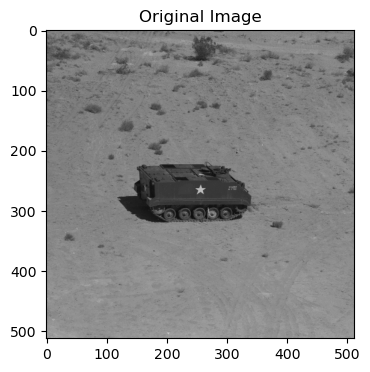

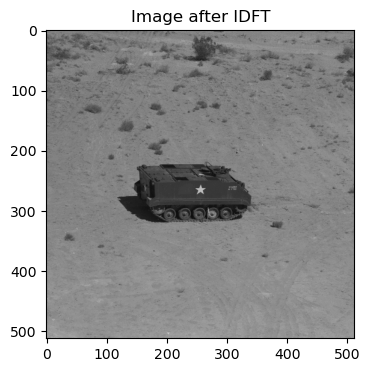

The IDFT of the DFT and the original image are the same


In [40]:
display_image(dft_image, title = "Original Image")
image_IDFT = IDFT_matrix(DFT_I)
display_image(abs(image_IDFT), title = "Image after IDFT")

var = True
for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        if (int(image_IDFT[i][j]) != dft_image[i][j]):
            print(int(image_IDFT[i][j]), dft_image[i][j])
            var = False
            print("False")
            break

if(var):
    print("The IDFT of the DFT and the original image are the same")


4. Show the importance of phase by transposing the phase matrix and then synthesizing the image.
Repeat by 
<br/> a) setting the phase to 0
<br/> b) by adding noise.

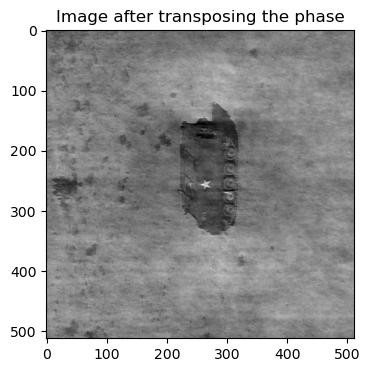

In [41]:
DFT_angle_transposed = DFT_angle.T
new_DFT = DFT_mag * np.exp(1j*DFT_angle_transposed)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after transposing the phase")

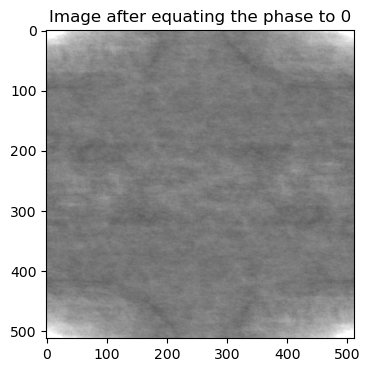

In [42]:
DFT_angle_zeros = np.zeros(DFT_I.shape)
new_DFT = DFT_mag * np.exp(1j*DFT_angle_zeros)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after equating the phase to 0")

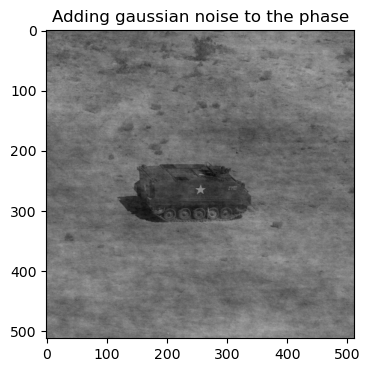

In [43]:
# adding gaussian noise:
np.random.seed(42)
noise = np.random.normal(0, 1, DFT_I.shape)

DFT_angle_noise = DFT_angle + noise

new_DFT = DFT_mag * np.exp(1j*DFT_angle_noise)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Adding gaussian noise to the phase")

1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transforma-
tion.

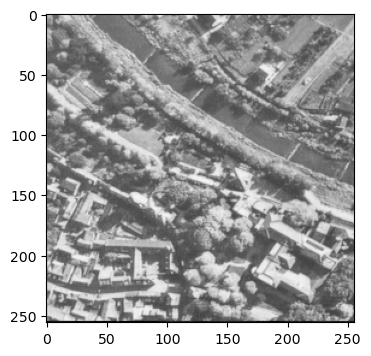

In [44]:
image_2 = read_image('misc/5.1.10.tiff')
dft_image = image_2
display_image(dft_image)

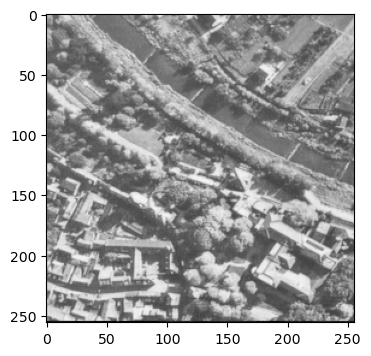

In [45]:
image_2 = read_image('misc/5.1.10.tiff')
dft_image = image_2
display_image(dft_image)

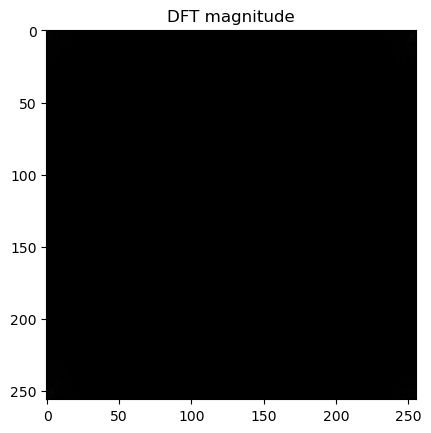

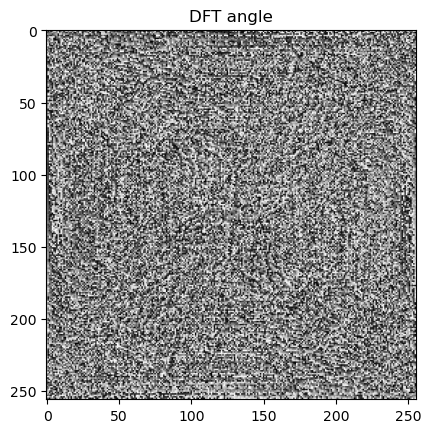

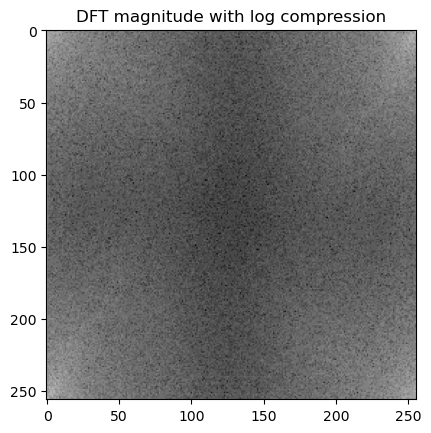

In [46]:
DFT_I = dft_matrix(dft_image)
DFT_mag = np.zeros(DFT_I.shape, dtype = np.float32)
# DFT_phase = 
DFT_mag = np.abs(DFT_I)
DFT_angle = np.angle(DFT_I)
DFT_mag_log = FSCS(log_magnitude_compression(DFT_mag))

plt.imshow(DFT_mag, cmap='gray')
plt.title("DFT magnitude")
plt.show()

plt.imshow(DFT_angle, cmap='gray')
plt.title("DFT angle")
plt.show()

plt.imshow(DFT_mag_log, cmap='gray')
plt.title("DFT magnitude with log compression")
plt.show()

Generate the centered DFT using $(−1)^{i+j}$ I and display its magnitude.

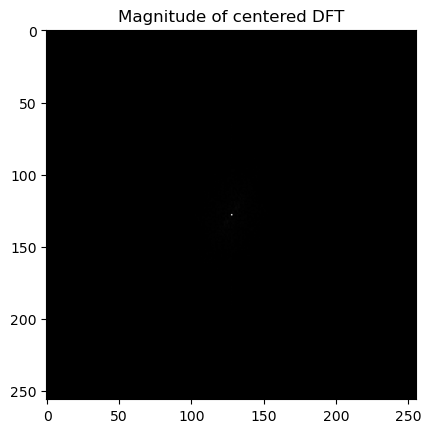

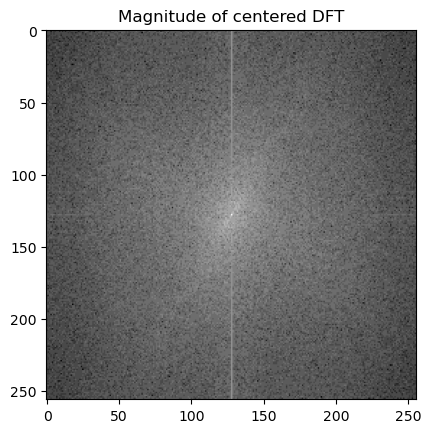

In [47]:
centered_I = np.zeros(dft_image.shape, dtype = np.float32)

for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        centered_I[i][j] = (-1)**(i + j) * dft_image[i][j]

centered_DFT = np.zeros(dft_image.shape, dtype = np.complex128)
centered_DFT = dft_matrix(centered_I)

centered_DFT_mag = abs(centered_DFT)

plt.imshow(centered_DFT_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

centered_DFT_log_mag = FSCS(log_magnitude_compression(centered_DFT_mag))


plt.imshow(centered_DFT_log_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

Verify that IDFT[DFT[I]] = I. (1)

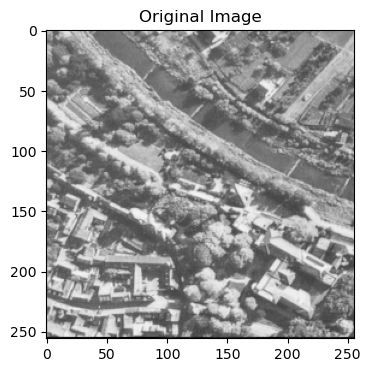

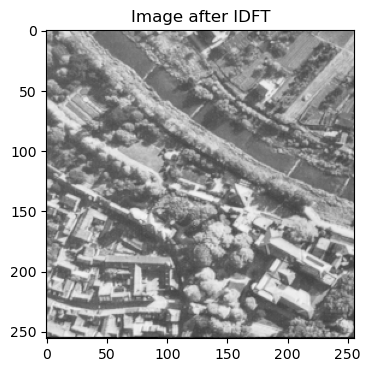

The IDFT of the DFT and the original image are the same


In [48]:
display_image(dft_image, title = "Original Image")
image_IDFT = IDFT_matrix(DFT_I)
display_image(abs(image_IDFT), title = "Image after IDFT")

var = True
for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        if (int(image_IDFT[i][j]) != dft_image[i][j]):
            print(int(image_IDFT[i][j]), dft_image[i][j])
            var = False
            print("False")
            break

if(var):
    print("The IDFT of the DFT and the original image are the same")


4. Show the importance of phase by transposing the phase matrix and then synthesizing the image.
Repeat by 
<br/> a) setting the phase to 0
<br/> b) by adding noise.

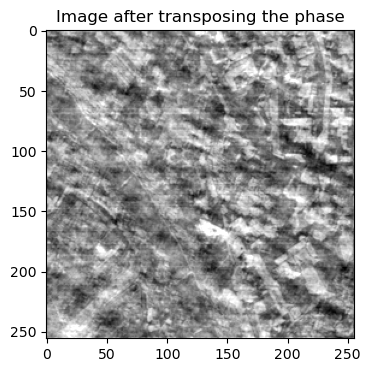

In [49]:
DFT_angle_transposed = DFT_angle.T
new_DFT = DFT_mag * np.exp(1j*DFT_angle_transposed)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after transposing the phase")

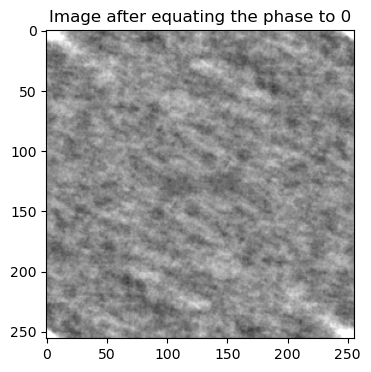

In [50]:
DFT_angle_zeros = np.zeros(DFT_I.shape)
new_DFT = DFT_mag * np.exp(1j*DFT_angle_zeros)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after equating the phase to 0")

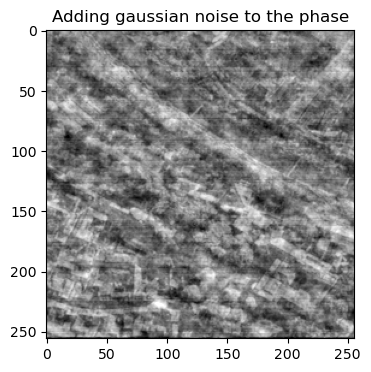

In [51]:
# adding gaussian noise:
np.random.seed(42)
noise = np.random.normal(0, 1, DFT_I.shape)

DFT_angle_noise = DFT_angle + noise

new_DFT = DFT_mag * np.exp(1j*DFT_angle_noise)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Adding gaussian noise to the phase")

1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transforma-
tion.

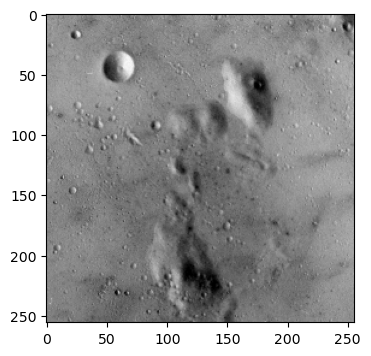

In [52]:
image_3 = read_image('misc/5.1.09.tiff')
dft_image = image_3
display_image(dft_image)

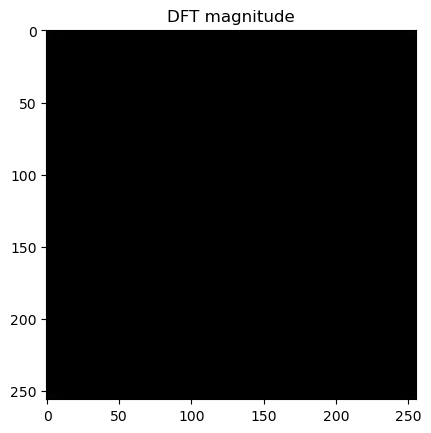

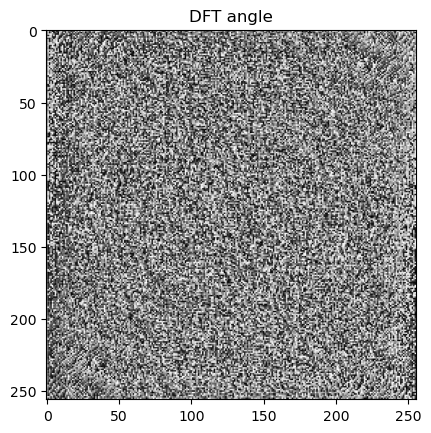

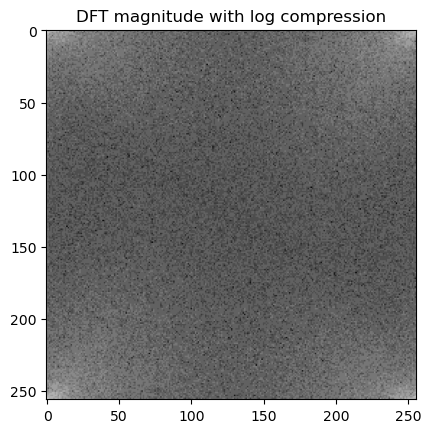

In [53]:
DFT_I = dft_matrix(dft_image)
DFT_mag = np.zeros(DFT_I.shape, dtype = np.float32)
# DFT_phase = 
DFT_mag = np.abs(DFT_I)
DFT_angle = np.angle(DFT_I)
DFT_mag_log = FSCS(log_magnitude_compression(DFT_mag))

plt.imshow(DFT_mag, cmap='gray')
plt.title("DFT magnitude")
plt.show()

plt.imshow(DFT_angle, cmap='gray')
plt.title("DFT angle")
plt.show()

plt.imshow(DFT_mag_log, cmap='gray')
plt.title("DFT magnitude with log compression")
plt.show()

Generate the centered DFT using $(−1)^{i+j}$ I and display its magnitude.

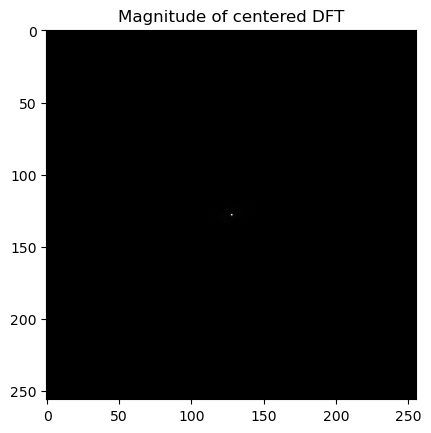

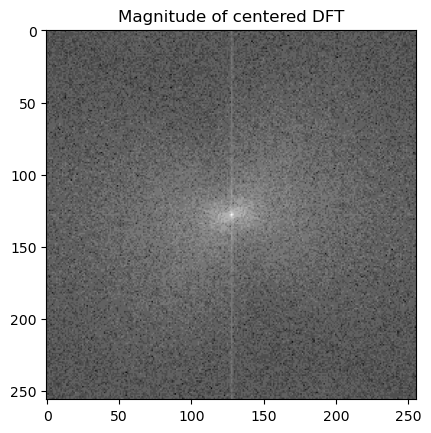

In [54]:
centered_I = np.zeros(dft_image.shape, dtype = np.float32)

for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        centered_I[i][j] = (-1)**(i + j) * dft_image[i][j]

centered_DFT = np.zeros(dft_image.shape, dtype = np.complex128)
centered_DFT = dft_matrix(centered_I)

centered_DFT_mag = abs(centered_DFT)

plt.imshow(centered_DFT_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

centered_DFT_log_mag = FSCS(log_magnitude_compression(centered_DFT_mag))


plt.imshow(centered_DFT_log_mag, cmap='gray')
plt.title("Magnitude of centered DFT")
plt.show()

Verify that IDFT[DFT[I]] = I. (1)

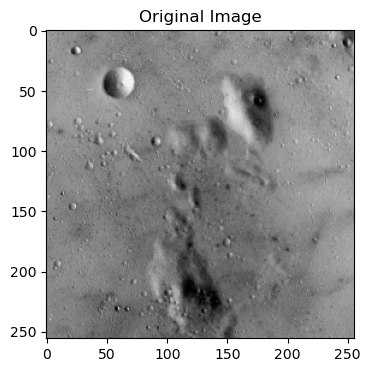

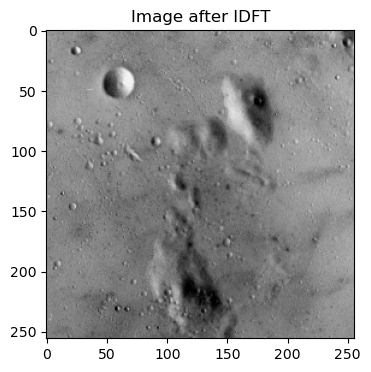

The IDFT of the DFT and the original image are the same


In [55]:
display_image(dft_image, title = "Original Image")
image_IDFT = IDFT_matrix(DFT_I)
display_image(abs(image_IDFT), title = "Image after IDFT")

var = True
for i in range(dft_image.shape[0]):
    for j in range(dft_image.shape[1]):
        if (int(image_IDFT[i][j]) != dft_image[i][j]):
            print(int(image_IDFT[i][j]), dft_image[i][j])
            var = False
            print("False")
            break

if(var):
    print("The IDFT of the DFT and the original image are the same")


4. Show the importance of phase by transposing the phase matrix and then synthesizing the image.
Repeat by 
<br/> a) setting the phase to 0
<br/> b) by adding noise.

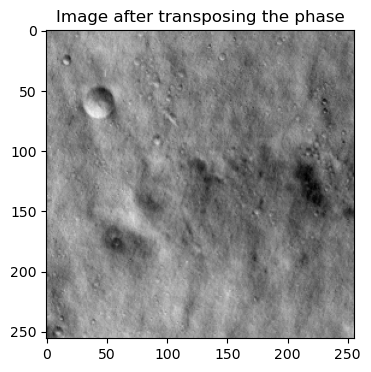

In [56]:
DFT_angle_transposed = DFT_angle.T
new_DFT = DFT_mag * np.exp(1j*DFT_angle_transposed)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after transposing the phase")

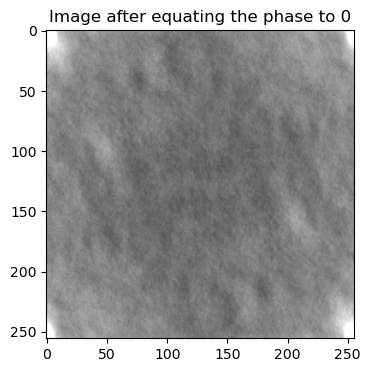

In [57]:
DFT_angle_zeros = np.zeros(DFT_I.shape)
new_DFT = DFT_mag * np.exp(1j*DFT_angle_zeros)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Image after equating the phase to 0")

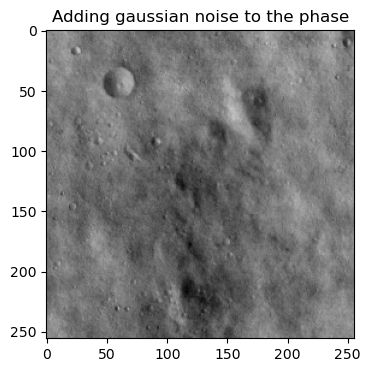

In [58]:
# adding gaussian noise:
np.random.seed(42)
noise = np.random.normal(0, 1, DFT_I.shape)

DFT_angle_noise = DFT_angle + noise

new_DFT = DFT_mag * np.exp(1j*DFT_angle_noise)

new_IDFT = IDFT_matrix(new_DFT)

display_image(new_IDFT, title = "Adding gaussian noise to the phase")